## Name: <span style="color:blue"> *Akanimoh Umoren* </span>

## <span style="color:blue">*ITSC 3156: Final Project* </span>

## <span style="color:blue"> *12/12/2024* </span>

## Imports

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Viewing

In [11]:
spotify_data = 'spotify_tracks.csv'
df = pd.read_csv(spotify_data)

In [12]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst Five Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check the shape of the dataset
print("\nDataset Shape:")
print(df.shape)

# Check basic statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       6

## Data Preprocessing

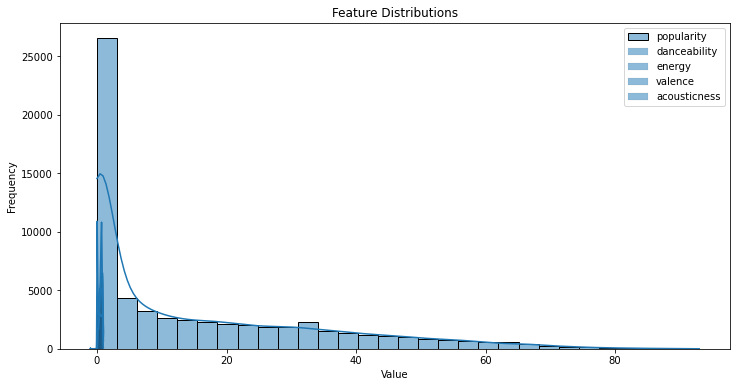

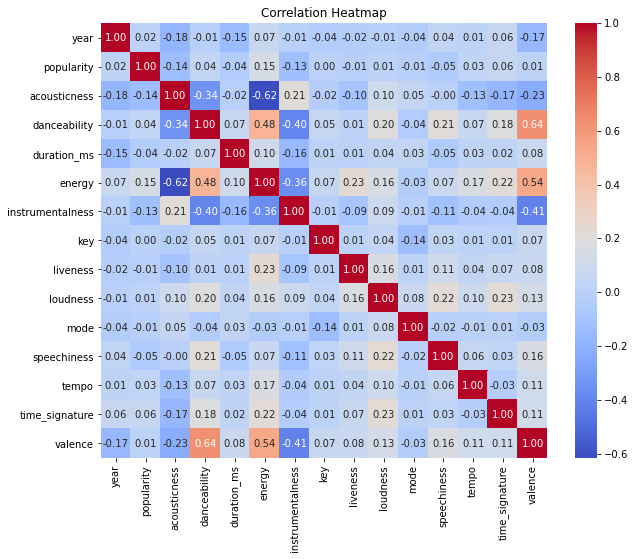

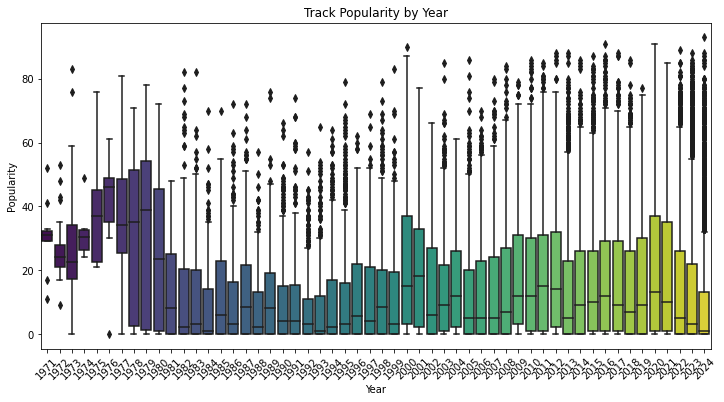


Preprocessed Training Data Shape: (49853, 71)

Preprocessed Testing Data Shape: (12464, 71)


In [16]:
# Distribution plots for key numerical features
key_features = ['popularity', 'danceability', 'energy', 'valence', 'acousticness']
plt.figure(figsize=(12, 6))
for feature in key_features:
    sns.histplot(df[feature], bins=30, kde=True, label=feature)
plt.legend()
plt.title("Feature Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns only
correlation_matrix = df[numeric_cols].corr()  # Calculate correlation
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Popularity by year visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='popularity', palette='viridis')
plt.xticks(rotation=45)
plt.title("Track Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

# ---- Step 3: Preprocessing ----
# Select features and target
numerical_features = [
    'danceability', 'energy', 'acousticness', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
    'duration_ms'
]
categorical_features = ['language', 'year']
target = 'popularity'

# Separate features (X) and target (y)
X = df[numerical_features + categorical_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Apply the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# ---- Step 4: Summary ----
print("\nPreprocessed Training Data Shape:", X_train_preprocessed.shape)
print("\nPreprocessed Testing Data Shape:", X_test_preprocessed.shape)

## Machine Learning

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---- Step 1: Define Models ----
# Linear Regression
linear_model = LinearRegression()

# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)

# ---- Step 2: Train Models ----
# Train Linear Regression
linear_model.fit(X_train_preprocessed, y_train)

# Train Random Forest
random_forest_model.fit(X_train_preprocessed, y_train)

# ---- Step 3: Test Models ----
# Predict on test data
y_pred_linear = linear_model.predict(X_test_preprocessed)
y_pred_rf = random_forest_model.predict(X_test_preprocessed)

# ---- Step 4: Evaluate Models ----
# Linear Regression Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Results
print("Linear Regression Performance:")
print(f"  Mean Squared Error: {mse_linear:.2f}")
print(f"  R² Score: {r2_linear:.2f}")

print("\nRandom Forest Regressor Performance:")
print(f"  Mean Squared Error: {mse_rf:.2f}")
print(f"  R² Score: {r2_rf:.2f}")

# ---- Step 5: Analyze Results ----
# Compare the results of the two models to determine which performs better.

Linear Regression Performance:
  Mean Squared Error: 303.25
  R² Score: 0.12

Random Forest Regressor Performance:
  Mean Squared Error: 229.14
  R² Score: 0.34


### Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---- Step 1: Define the Model ----
gradient_boosting_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# ---- Step 2: Train the Model ----
gradient_boosting_model.fit(X_train_preprocessed, y_train)

# ---- Step 3: Test the Model ----
y_pred_gb = gradient_boosting_model.predict(X_test_preprocessed)

# ---- Step 4: Evaluate the Model ----
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print Results
print("Gradient Boosting Regressor Performance:")
print(f"  Mean Squared Error: {mse_gb:.2f}")
print(f"  R² Score: {r2_gb:.2f}")


Gradient Boosting Regressor Performance:
  Mean Squared Error: 275.56
  R² Score: 0.20
